# Monte Carlo Simulation of the Black-Scholes Model
This notebook simulates the pricing of a European call option using Monte Carlo methods and compares the result with the analytical Black-Scholes solution.


In [16]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

### Black-Scholes Closed-Form Formula

In [17]:
# Black-Scholes closed-form formula for a European call option
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

### Monte Carlo Estimator

In [10]:
def monte_carlo_call_price(S0, K, T, r, sigma, N):
    Z = np.random.randn(N)
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(ST - K, 0)
    call_price = np.exp(-r * T) * np.mean(payoff)
    return call_price, ST

# Parameters
S0 = 100     # Initial stock price
K = 100      # Strike price
T = 1.0      # Time to maturity
r = 0.05     # Risk-free interest rate
sigma = 0.2  # Volatility
N = 10**5    # Number of simulations


### Run Simulation

In [18]:
# Estimate call price using Monte Carlo and Black-Scholes methods
mc_call_price, terminal_prices = monte_carlo_call_price(S0, K, T, r, sigma, N)
bs_call_price = black_scholes_call_price(S0, K, T, r, sigma)

# Print results
print(f"Monte Carlo Estimated Call Price: {mc_call_price:.4f}")
print(f"Black-Scholes Analytical Call Price: {bs_call_price:.4f}")

Monte Carlo Estimated Call Price: 10.4287
Black-Scholes Analytical Call Price: 10.4506


### Histogram of Terminal Stock Prices

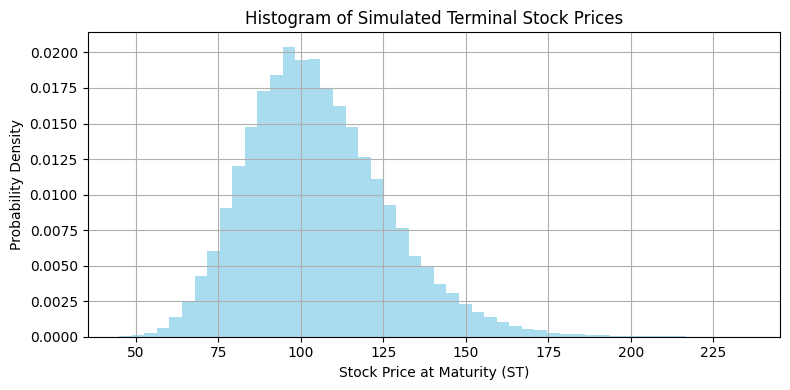

In [19]:
# Plot the distribution of simulated terminal stock prices
plt.figure(figsize=(8, 4))
plt.hist(terminal_prices, bins=50, density=True, alpha=0.7, color='skyblue')
plt.title("Histogram of Simulated Terminal Stock Prices")
plt.xlabel("Stock Price at Maturity (ST)")
plt.ylabel("Probability Density")
plt.grid(True)
plt.tight_layout()
plt.show()

### Convergence Plot

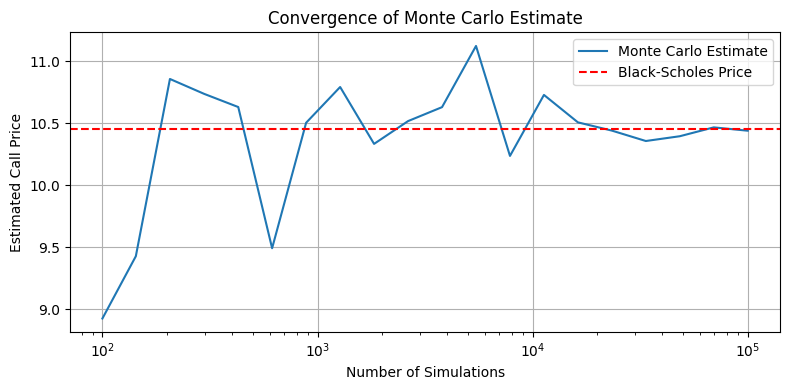

In [ ]:
# Show convergence of estimated price as number of simulations increases
estimates = []
sim_counts = np.logspace(2, 5, 20, dtype=int)

for n in sim_counts:
    est, _ = monte_carlo_call_price(S0, K, T, r, sigma, n)
    estimates.append(est)

plt.figure(figsize=(8, 4))
plt.plot(sim_counts, estimates, label="Monte Carlo Estimate")
plt.axhline(y=bs_price, color='r', linestyle='--', label="Black-Scholes Price")
plt.xscale('log')
plt.xlabel("Number of Simulations")
plt.ylabel("Estimated Call Price")
plt.title("Convergence of Monte Carlo Estimate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Analysis
This section evaluates the accuracy, performance, and limitations of the Monte Carlo simulation compared to the analytical Black-Scholes solution. It also extends the simulation to include put option pricing.

In [ ]:
# Measure the runtime of Monte Carlo simulation
import time

start = time.time()
mc_price, _ = monte_carlo_call_price(S0, K, T, r, sigma, N)
end = time.time()

print(f"Monte Carlo Price: {mc_price:.4f}")
print(f"Black-Scholes Price: {bs_price:.4f}")
print(f"Runtime (Monte Carlo, N = {N}): {end - start:.4f} seconds")

Monte Carlo Price: 10.4350
Black-Scholes Price: 10.4506
Runtime (Monte Carlo, N = 100000): 0.0135 seconds


### Error Sources

- **Sampling Error**: Monte Carlo relies on random sampling, so results vary slightly each run.
- **Convergence**: The error decreases as the number of simulations increases (Law of Large Numbers).
- **Discretization**: Not applicable here since terminal price is simulated directly, but for path-dependent options, time-step errors can arise.

In [44]:
# Monte Carlo and Black-Scholes pricing for European put options

def monte_carlo_put_price(S0, K, T, r, sigma, N):
    Z = np.random.randn(N)
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
    payoff = np.maximum(K - ST, 0)
    return np.exp(-r * T) * np.mean(payoff)

def black_scholes_put_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Compute prices
mc_put = monte_carlo_put_price(S0, K, T, r, sigma, N)
bs_put = black_scholes_put_price(S0, K, T, r, sigma)

print(f"Monte Carlo Estimated Put Price: {mc_put:.4f}")
print(f"Black-Scholes Analytical Put Price: {bs_put:.4f}")


Monte Carlo Estimated Put Price: 5.6414
Black-Scholes Analytical Put Price: 5.5735
